**Group Project: Phase 1**

![](https://drive.google.com/uc?id=1ohU_7BnmbhhNzCEmJygGqUx11KNxe2KN)

New York is the largest city in the United States, with an estimated 2019 population of 19.49 million. This data set comprises of the people who locally live there as well as the tourists which visit the city annually. It is a major tourist attraction with many people visiting the city from various countries like Spain, France, Russia, etc. It is a favourite vacation spot for many families. With many people also working in the city, it is always a challenge to find a suitable living space which is affordable and in suitable locality. Therefore with the available dataset and contributing analysis of the data, we will try providing cost effective locations to the clients.


**Table of contents**

•	[Importing Libraries](#Importing-Libraries)

•	[Reading the File](#Reading-the-File)

•	[Data Cleansing](#Data-Cleansing)

•	[Data Preprocessing](#Data-Preprocessing)

•	[Unique neighbourhoods](#Unique-neighbourhoods)

•	[Methods Exploration](#Methods-Exploration)

•	[Univariate Analysis](#Univariate-Analysis)

 > o	[Price In Brooklyn](#Price-In-Brooklyn)

  >o	[Price in Manhattan](#Price-in-Manhattan)

  >o	[Price in Staten](#Price-in-Staten)

 > o	[Price in Queens](#Price-in-Queens)

  >o	[Price in Bronx](#Price-in-Bronx)

  >o	[Room Type Distribution](#Room-Type-Distribution)

  >o	[Private Rooms](#Private-Rooms)

  >o	[Home or Apartment](#Home-or-Apartment)

 > o	[Shared Rooms](#Shared-Rooms)

 > o	[Ratings](#Ratings)

  >o	[Empty Rooms](#Empty-Rooms)

  >o	[Period spent in a Room](#Period-spent-in-a-Room)

 > >	[Private room time:](#Private-room-time:)

  > >	[Shared room time:](#Shared-room-time:)

  > >	[Home or Apartment time:](#Home-or-Apartment-time:)

•	[Bivariate Analysis](#Bivariate-Analysis)

 > o	[Groups](#Groups)

> > 	[Top 20 Hosts](#Top-20-Hosts)

 > o	[Availability](#Availability)

•	[Linear Regression](#Linear-Regression)

•	[Conclusion](#Conclusion)


#Importing Libraries

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading the File

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/NYC-Airbnb-2023.csv")
df2 = pd.read_csv("/content/drive/My Drive/AB_NYC_2019.csv")

<ipython-input-3-ae9e3f91e9a5>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/drive/My Drive/NYC-Airbnb-2023.csv")


In [ ]:
df19=df2.drop(['host_name','last_review'],axis=1)
df23=df1.drop(['host_name','last_review','number_of_reviews_ltm','license'],axis=1)

In [ ]:
df19=df2.drop(['host_name','last_review','reviews_per_month'],axis=1)
df23=df1.drop(['host_name','last_review','reviews_per_month','number_of_reviews_ltm','license'],axis=1)

In [ ]:
df19.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
df23.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,3,314
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2,365
2,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,1,0
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,1,106
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,1,181


Configuring Types of Attributes:-

In [ ]:
#2023
#Attribute room_type is nominal in its nature. Since it is categorical
df23.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
#2019
df19.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**Identifying the types of Attributes in the Data:-**

There are 16 attributes in the data, namely:-

1. id : Discrete - Numeric Attribute
2. name : Nominal Attribute
3. neighbourhood_group : Nominal Attribute
4. neighbourhood : Nominal Attribute
5. latitude : Interval-Scaled Numeric	Attribute
6. longitude : Interval-Scaled Numeric Attribute
7. room_type : Nominal Attribute
8. price : Discrete-Numeric Attribute
9. minimum_nights : Discrete-Numeric Attribute
10. number_of_reviews : Discrete-Numeric Attribute
11. reviews_per_month : Discrete-Numeric Attribute
12. calculated_host_listings_count : Discrete-Numeric	Attribute
13. availability_365 : Discrete-Numeric Attribute
---






In [ ]:
#2023
#Min :1
#Max : 1250
df23.minimum_nights.unique()

array([  30,    2,   60,    3,    4,    1,   28,    7,   14,  120,   90,
         45,    6,   15,   10,    5,   31,   21,   29,  200,  181,  365,
         85,   12,   75,   20,  180,  300,    9,   50,   18,  150,   89,
        370,   70,    8,  115,   80,   25,   24,   58,  100,  265,  185,
         56,   32,  270,   39,  210,   19,  250,  360, 1124,   63,   62,
         59, 1250,   23,   27,  198,   79,  500,   55,   40,   16,  480,
         13,   99,  345,  119,  186,   35,  366,  199,   68,  183,   93,
        364,   11,   91,  299,  400,   17,   52,  108,   98,   88,  133,
        222,   86,  240,  130,  184,  153,  999,   53,  160,  114,  169,
         33,   43,   96,   76,  145,  182, 1000,   38,  304,  307,  110,
         26,   36,  273,  238,   46,   92,  259,   22,  140,   64,   94,
         48,  356,  310,   65,   78,  244,  280])

In [ ]:
#2019
#Min: 1
#Max: 1250
df19.minimum_nights.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

#Data Cleansing

Checking For Mising values, If Any :-

In [ ]:
#2023
df23.shape

(42931, 13)

In [ ]:
#2019
df19.shape

(48895, 13)

The code above provides us with the total number of rows filled as 48895 and the total number of columns per row are 16, which are also known as the attributes for the data.

In [ ]:
#2023
df23.isnull().sum()

id                                 0
name                              12
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
#2019
df19.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#Data Preprocessing

Inserting values for the null characters or spaces.

In [ ]:
#hosts-IDs with majority of  house listings
#From the result above, we can deduct the hosts with maximum house listings are:-
#1. ID.219517861 with 327 house listings.( 1rst Highest Rank)
#2. ID.107434423 with 232 house listings.( 2nd Highest Rank)
#3. ID.30283594  with 121 house listings.( 3rd Highest Rank)

#There are other id's with house listings comparatively low in number than the ones listed above.

Top10_Host=df19.host_id.value_counts().head(10)
Top10_Host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
#hosts-IDs with majority of  house listings
Top10_Host=df23.host_id.value_counts().head(10)
Top10_Host

107434423    526
3223938      394
496944100    356
305240193    222
19303369     207
200239515    192
204704622    178
162280872    159
51501835     131
137358866    124
Name: host_id, dtype: int64

#Unique neighbourhoods

There are different areas in New York. To represent this, the categories provided will be used.

In [ ]:
df19.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df23.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

This shows us that there are house listings from the five Boroughs of New York namely:-
1. Brooklyn
2. Manhattan
3. Queens
4. Staten Island
5. Bronx

In [ ]:
#Neighbourhood in 5 Boroughs
df19.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
#Calculating top 10 neighbourhoods with maximum number of house listings in 2023.
df19.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [ ]:
#Calculating bottom 10 neighbourhoods with maximum number of house listings in 2023.
df19.neighbourhood.value_counts().tail(10)

Howland Hook       2
Lighthouse Hill    2
Silver Lake        2
West Farms         2
Woodrow            1
Fort Wadsworth     1
Richmondtown       1
New Dorp           1
Rossville          1
Willowbrook        1
Name: neighbourhood, dtype: int64

In [ ]:
#Neighbourhood in 5 Boroughs
df23.neighbourhood.unique()

array(['Midtown', 'Bedford-Stuyvesant', 'Upper West Side', 'Sunset Park',
       'Clinton Hill', 'Upper East Side', 'South Slope', "Hell's Kitchen",
       'Williamsburg', 'East Harlem', 'West Village', 'East Flatbush',
       'Astoria', 'Greenpoint', 'Nolita', 'Fort Greene',
       'Prospect Heights', 'Washington Heights', 'Boerum Hill', 'Harlem',
       'Chinatown', 'Greenwich Village', 'Kingsbridge', 'Bushwick',
       'Flatbush', 'Sunnyside', 'East Village', 'Long Island City',
       'Lower East Side', 'Carroll Gardens', 'St. George', 'Chelsea',
       'Park Slope', 'Ridgewood', 'Mott Haven', 'Morningside Heights',
       'Gowanus', 'Crown Heights', 'Kips Bay', 'Ditmars Steinway',
       'Middle Village', 'Jamaica', 'Brooklyn Heights', 'Rockaway Beach',
       'Flatiron District', 'Windsor Terrace', 'Tribeca', 'Clason Point',
       'Eastchester', 'Forest Hills', 'Murray Hill', 'University Heights',
       'Gravesend', 'Shore Acres', 'Allerton', 'Richmond Hill',
       'Woodside',

In [ ]:

# Filter the DataFrame based on the condition of 'neighbourhood_group' being 'Group A'
condition = df19['neighbourhood_group'] == 'Brooklyn'
filtered_df = df19[condition]

# Count the occurrences of each unique value in the 'neighbourhood' column within the filtered DataFrame
counts = filtered_df['neighbourhood'].value_counts()

print(counts)

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Sunset Park                   390
Prospect Heights              357
South Slope                   284
Gowanus                       247
Carroll Gardens               233
East New York                 218
Boerum Hill                   177
Kensington                    175
Sheepshead Bay                164
Windsor Terrace               157
Brooklyn Heights              154
Canarsie                      147
Bay Ridge                     141
Borough Park                  136
Cypress Hills                 135
Midwood                       109
Cobble Hill                    99
Downtown Brooklyn              83
Flatlands     

In [ ]:
#Calculating top 10 neighbourhoods with maximum number of house listings in 2023.
df23.neighbourhood.value_counts().head(10)

Bedford-Stuyvesant    3086
Williamsburg          2597
Midtown               2182
Harlem                2081
Bushwick              1810
Upper West Side       1541
Hell's Kitchen        1522
Upper East Side       1432
Crown Heights         1330
East Village          1155
Name: neighbourhood, dtype: int64

In [ ]:
#Calculating bottom 10 neighbourhoods with maximum number of house listings in 2023.
df23.neighbourhood.value_counts().tail(10)

Huguenot                  3
Howland Hook              2
Westerleigh               2
Chelsea, Staten Island    2
Country Club              2
Willowbrook               1
Lighthouse Hill           1
Fort Wadsworth            1
New Dorp                  1
Neponsit                  1
Name: neighbourhood, dtype: int64

#Methods Exploration

Several methods will be explored and tested to conclude which method best applies in this case.







> Analysis List:
*   Univariate
*   Bivariate
*   Linear Regression














#Univariate Analysis

Area

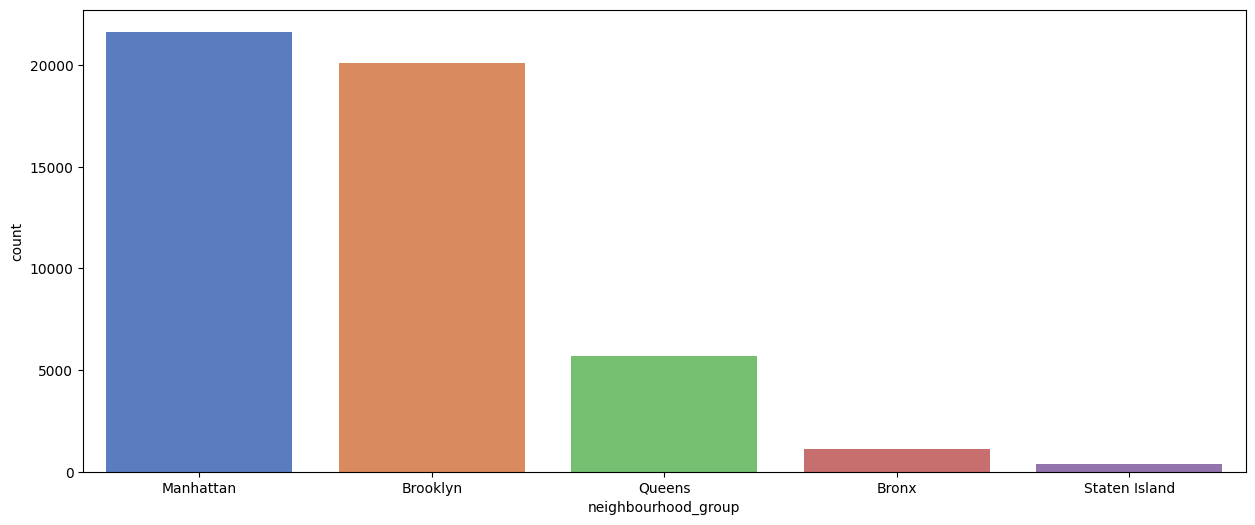

In [ ]:
df19['neighbourhood_group'] = df19['neighbourhood_group'].astype('category')

# Set up the figure and axes
f, ax = plt.subplots(figsize=(15, 6))

# Create the countplot with explicitly defined category order
ax = sns.countplot(x='neighbourhood_group', data=df19, order=df19['neighbourhood_group'].value_counts().index, palette='muted')

# Show the plot
plt.show()

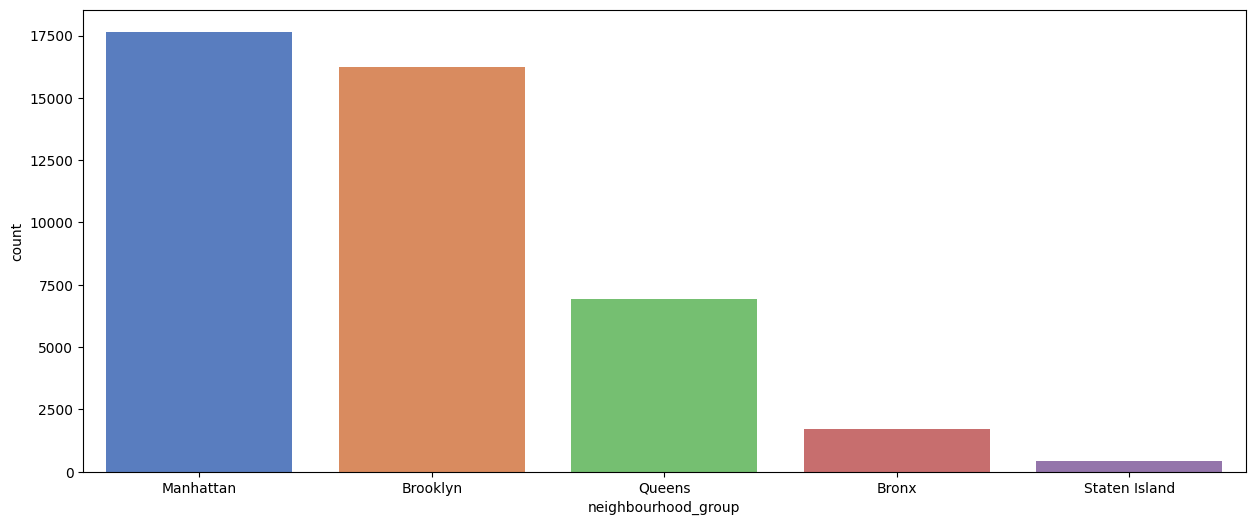

In [ ]:
df23['neighbourhood_group'] = df23['neighbourhood_group'].astype('category')

# Set up the figure and axes
f, ax = plt.subplots(figsize=(15, 6))

# Create the countplot with explicitly defined category order
ax = sns.countplot(x='neighbourhood_group', data=df23, order=df23['neighbourhood_group'].value_counts().index, palette='muted')

# Show the plot
plt.show()

From the data above, we conclude that there is more house vacancies in Brooklyn and Manhattan in comparison to the other three Boroughs.

##Price In Brooklyn

<ipython-input-15-b86e666bce1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


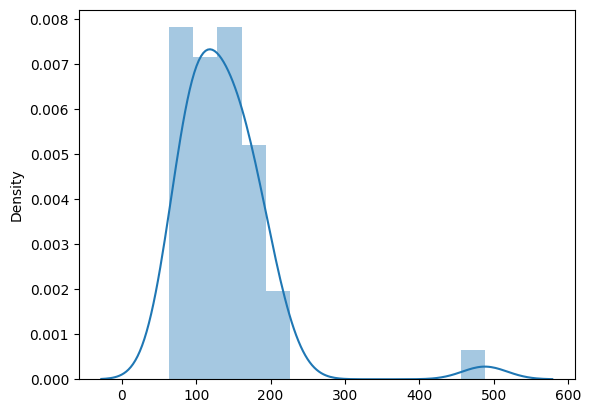

In [ ]:
df1 = df19[df19.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-32-a559c0bb99aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


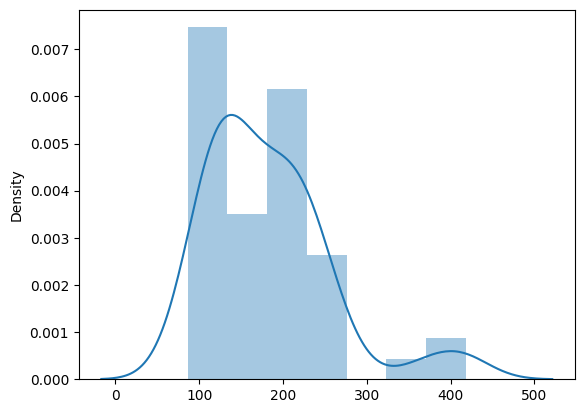

In [ ]:
df2 = df23[df23.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-33-17c5abea00e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)


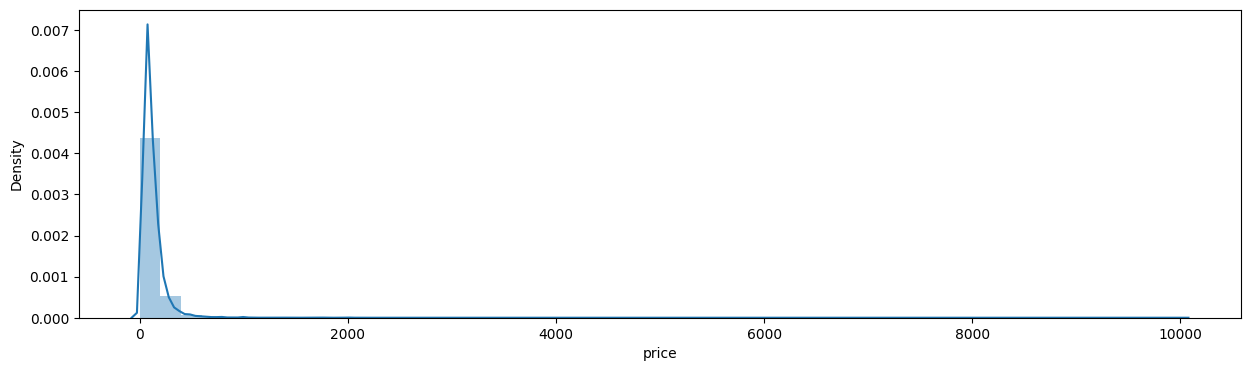

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df19[df19.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

<ipython-input-34-75bfa99d7609>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2)


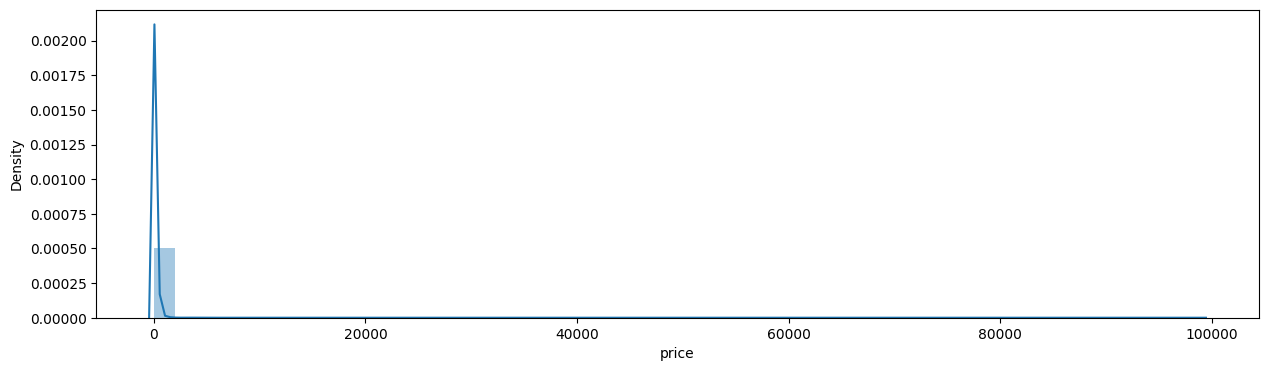

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df23[df23.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df2)
plt.show()

##Price in Manhattan

<ipython-input-35-f887cc48022b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


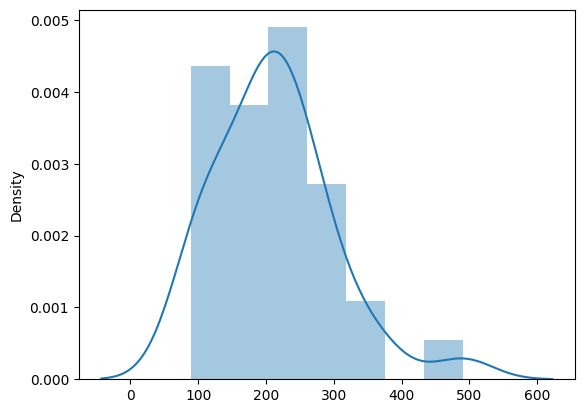

In [ ]:
df1 = df19[df19.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-36-e053f5a16661>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


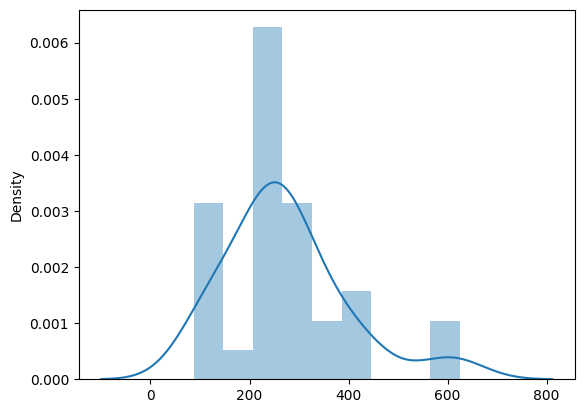

In [ ]:
df2 = df23[df23.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-37-850cdbc57aa3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)


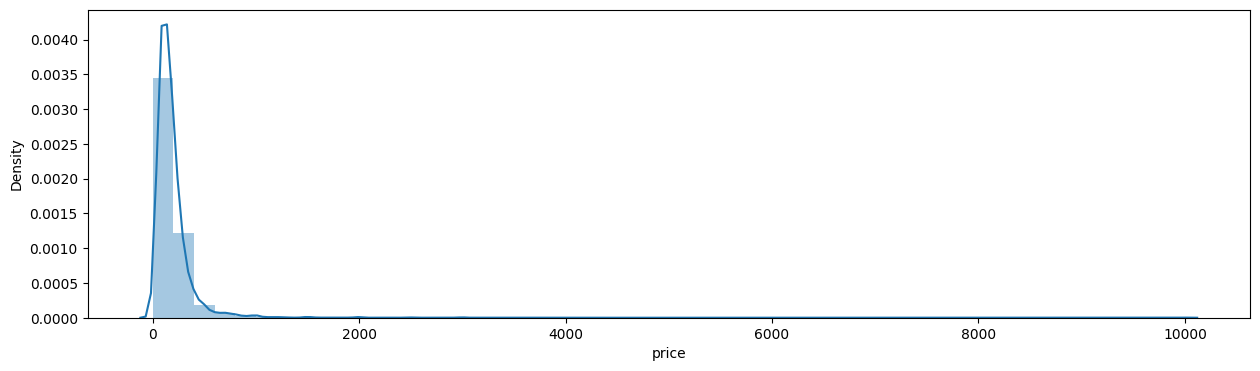

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df19[df19.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()

<ipython-input-38-7fdb7732149f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2)


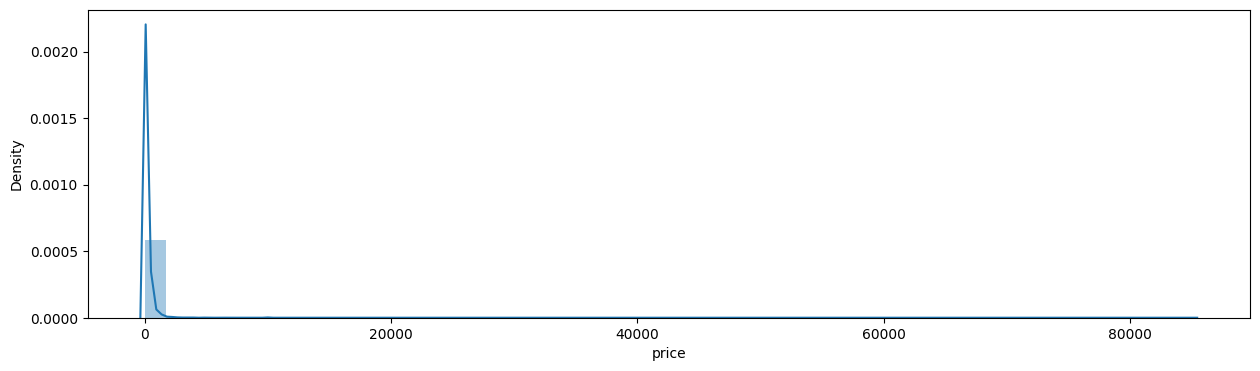

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df23[df23.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df2)
plt.show()

##Price in Staten

<ipython-input-39-d43f85d34fd3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


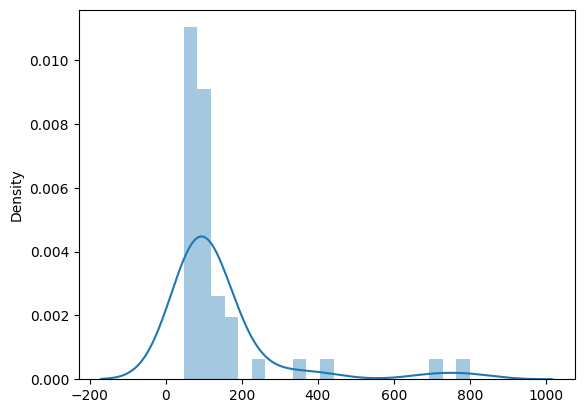

In [ ]:
df1 = df19[df19.neighbourhood_group == "Staten Island"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-40-a34cd1508b49>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


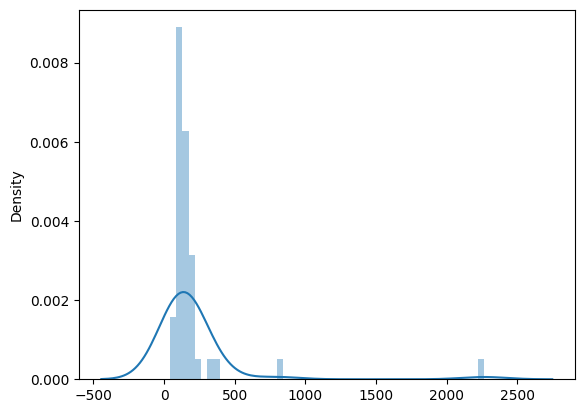

In [ ]:
df2 = df23[df23.neighbourhood_group == "Staten Island"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-41-4ae163567094>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)


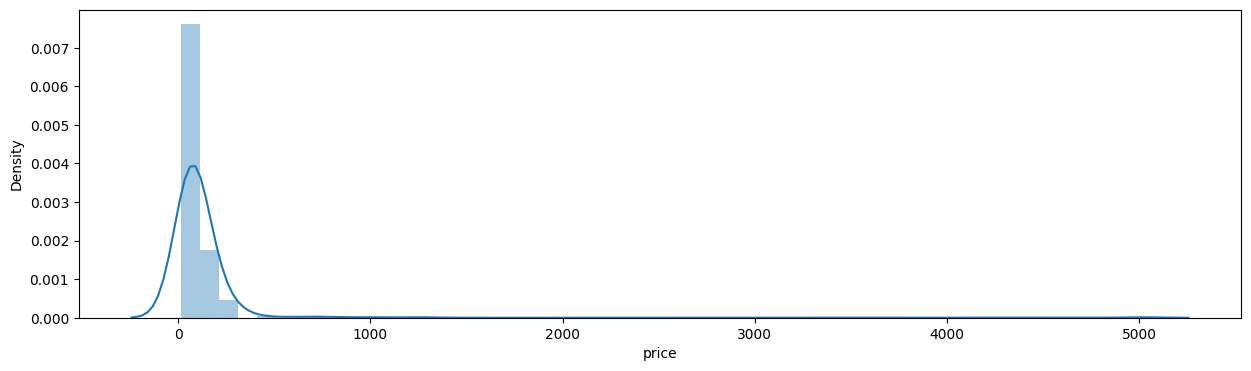

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df19[df19.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df1)
plt.show()

<ipython-input-42-de9d30879f2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2)


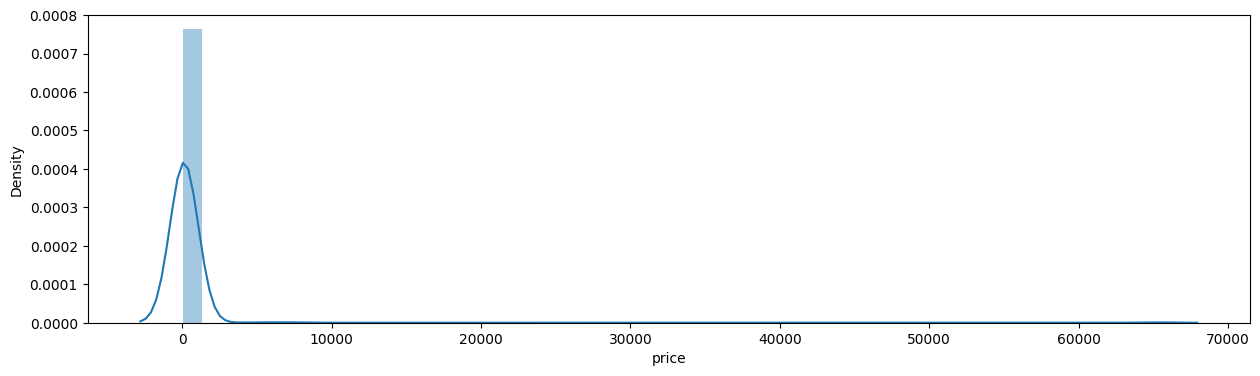

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df23[df23.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df2)
plt.show()

##Price in Queens

<ipython-input-43-a4078b56c3c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)


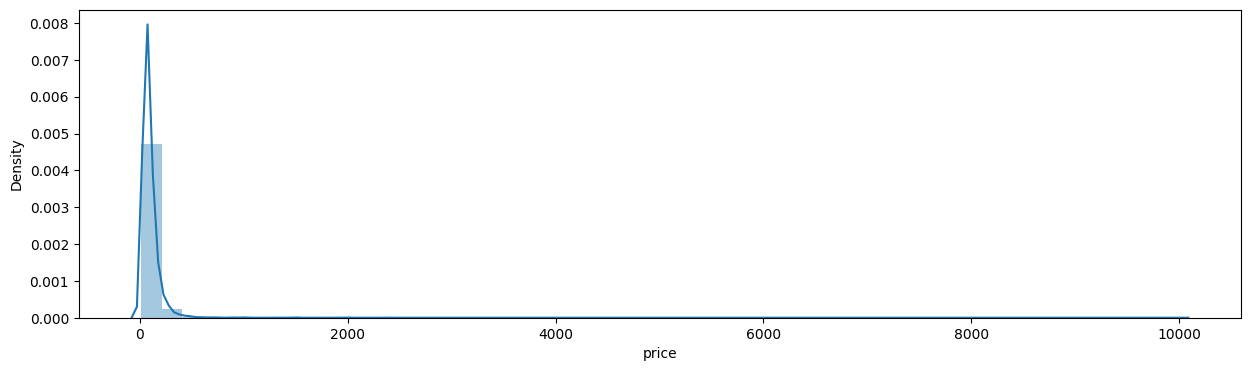

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df19[df19.neighbourhood_group=="Queens"]['price']
sns.distplot(df1)
plt.show()

<ipython-input-44-b7871c639a94>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2)


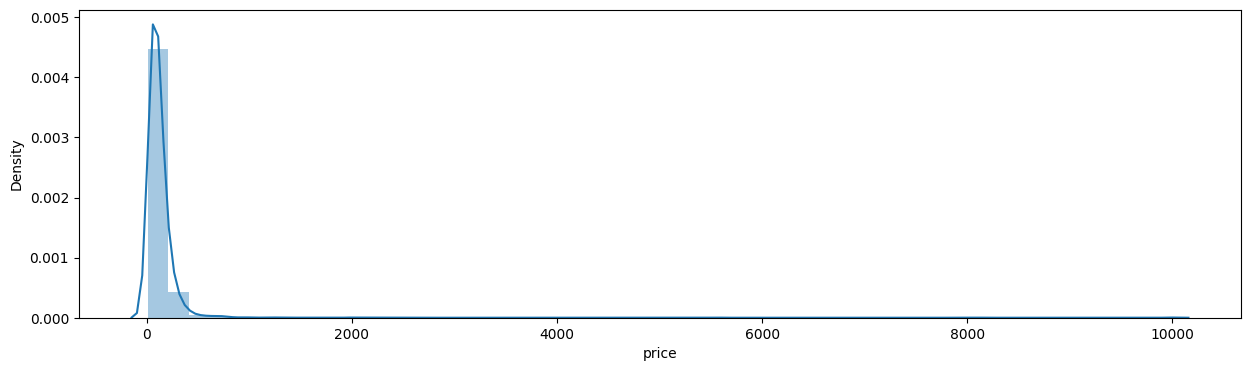

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df23[df23.neighbourhood_group=="Queens"]['price']
sns.distplot(df2)
plt.show()

<ipython-input-45-d2f4db8b6a63>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


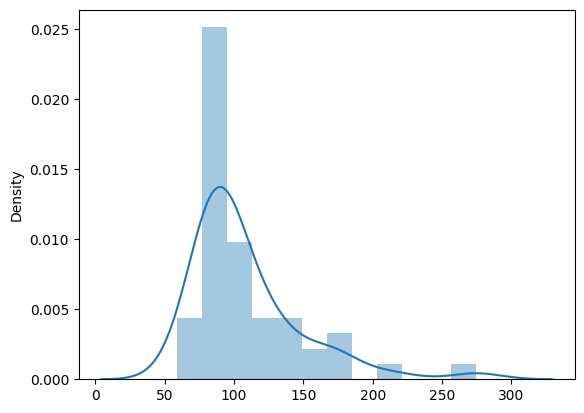

In [ ]:
df1 = df19[df19.neighbourhood_group == "Queens"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-46-027e8b31674a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


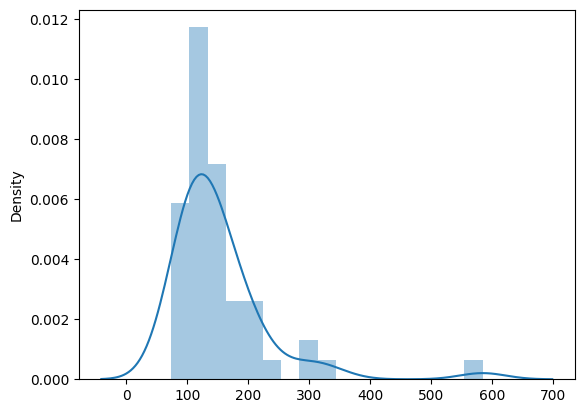

In [ ]:
df2 = df23[df23.neighbourhood_group == "Queens"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

##Price in Bronx

<ipython-input-47-5a3e544ca921>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)


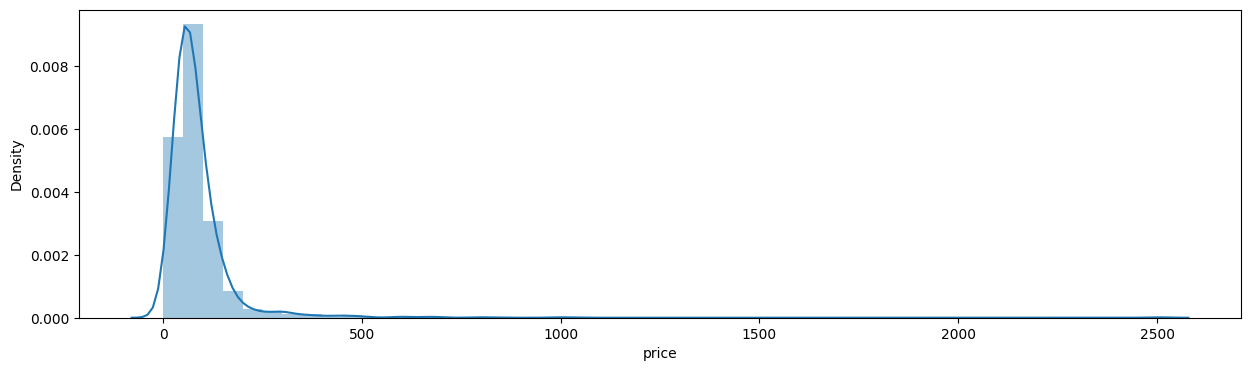

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df19[df19.neighbourhood_group=="Bronx"]['price']
sns.distplot(df1)
plt.show()

<ipython-input-48-009fc37d9e08>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2)


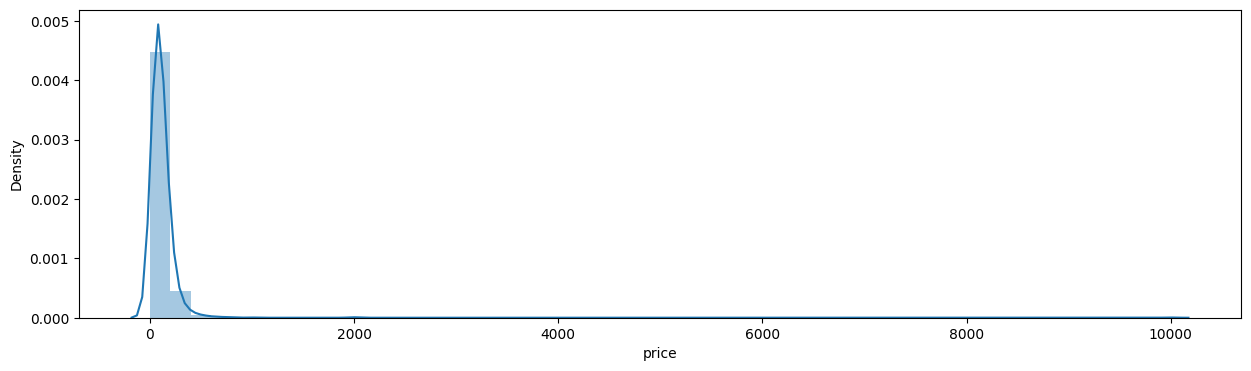

In [ ]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df23[df23.neighbourhood_group=="Bronx"]['price']
sns.distplot(df2)
plt.show()

<ipython-input-49-25f69bc8c7b5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


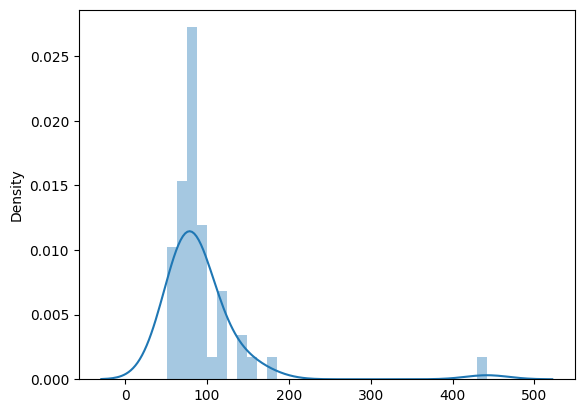

In [ ]:
df1 = df19[df19.neighbourhood_group == "Bronx"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

<ipython-input-50-a05b1df3eb63>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


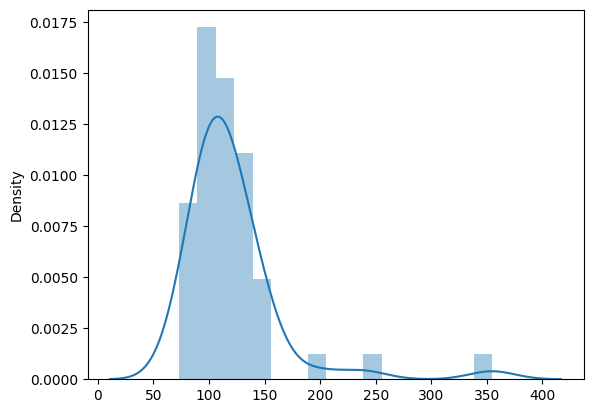

In [ ]:
df2 = df23[df23.neighbourhood_group == "Bronx"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

##Room Type Distribution

In [ ]:
df19['room_type'] = df19['room_type'].astype(str)

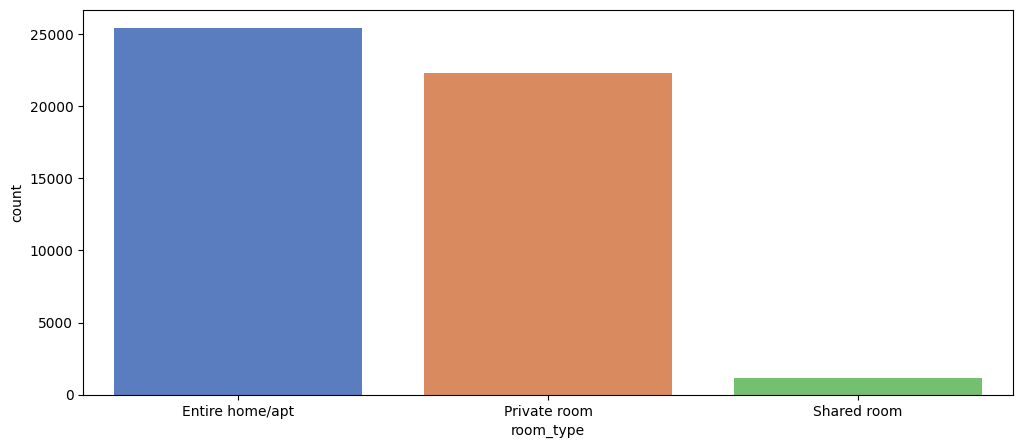

In [ ]:
# Set up the figure and axes
f, ax = plt.subplots(figsize=(12, 5))

# Create the countplot with explicitly defined category order
ax = sns.countplot(x='room_type', data=df19, order=df19['room_type'].value_counts().index, palette='muted')

# Show the plot
plt.show()

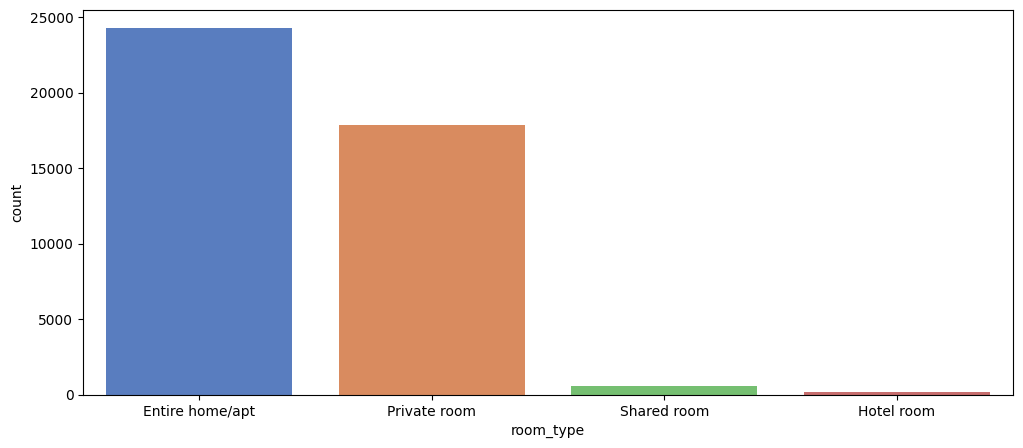

In [ ]:
# Set up the figure and axes
f, ax = plt.subplots(figsize=(12, 5))

# Create the countplot with explicitly defined category order
ax = sns.countplot(x='room_type', data=df23, order=df23['room_type'].value_counts().index, palette='muted')

# Show the plot
plt.show()

##Private Rooms

<ipython-input-54-b7431c008f35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


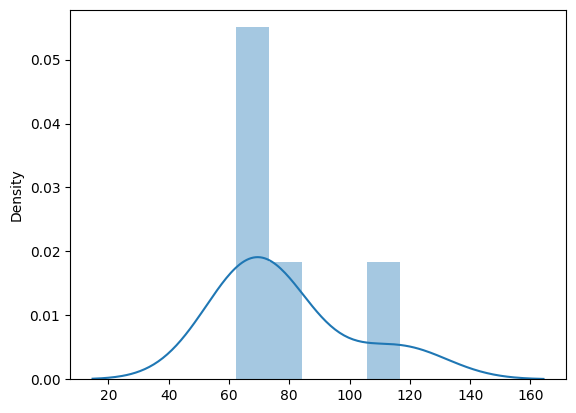

In [ ]:
df19 = df19[df19.room_type == "Private room"][["neighbourhood_group","price"]]
d = df19.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

<ipython-input-55-4b394e001aba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


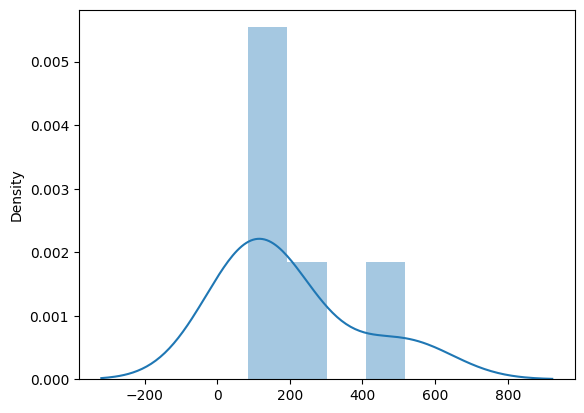

In [ ]:
df23 = df23[df23.room_type == "Private room"][["neighbourhood_group","price"]]
d = df23.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

##Home or Apartment

<ipython-input-62-9b5b8b06c68a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


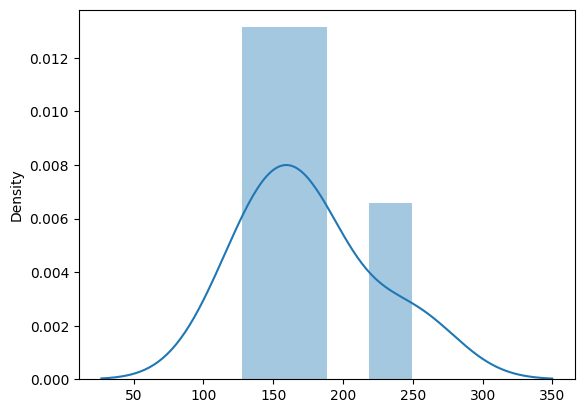

In [ ]:
df19 = df19[df19.room_type == "Entire home/apt"][["neighbourhood_group","price"]]
d = df19.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

In [ ]:
df23 = df23[df23.room_type == "Entire home/apt"][["neighbourhood_group","price"]]
d = df23.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

In [ ]:
# Make sure the column name is correct
df19_filtered = df19[df19['room_type'] == 'Entire home/apt']['price']

# Set up the figure and axes
f, ax = plt.subplots(figsize=(15, 5))

# Create the distribution plot
ax = sns.distplot(df19_filtered)

# Show the plot
plt.show()


In [ ]:
df23 = df23[df23.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df23)
plt.show()

##Shared Rooms

In [ ]:
df19 = df19[df19.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df19)
plt.show()

In [ ]:
df23 = df23[df23.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df23)
plt.show()

##Ratings

In [ ]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df19.reviews_per_month)
plt.show()

##Empty Rooms

In [ ]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df19.availability_365)
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df23.availability_365)
plt.show()

##Period spent in a Room

###Private room time:

In [ ]:
df19 = df19[df19.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(50,5))
ax = sns.swarmplot(y= df19.index,x= df19.values)
plt.xlabel("minimum_nights")
plt.show()

###Shared room time:

In [ ]:
df19 = df19[df19.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df19.index,x= df19.values)
plt.xlabel("minimum_nights")
plt.show()

###Home or Apartment time:

In [ ]:
df19 = df19[df19.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(50,5))
ax = sns.swarmplot(y= df19.index,x= df19.values)
plt.xlabel("minimum_nights")
plt.show()

#Bivariate Analysis

##Groups

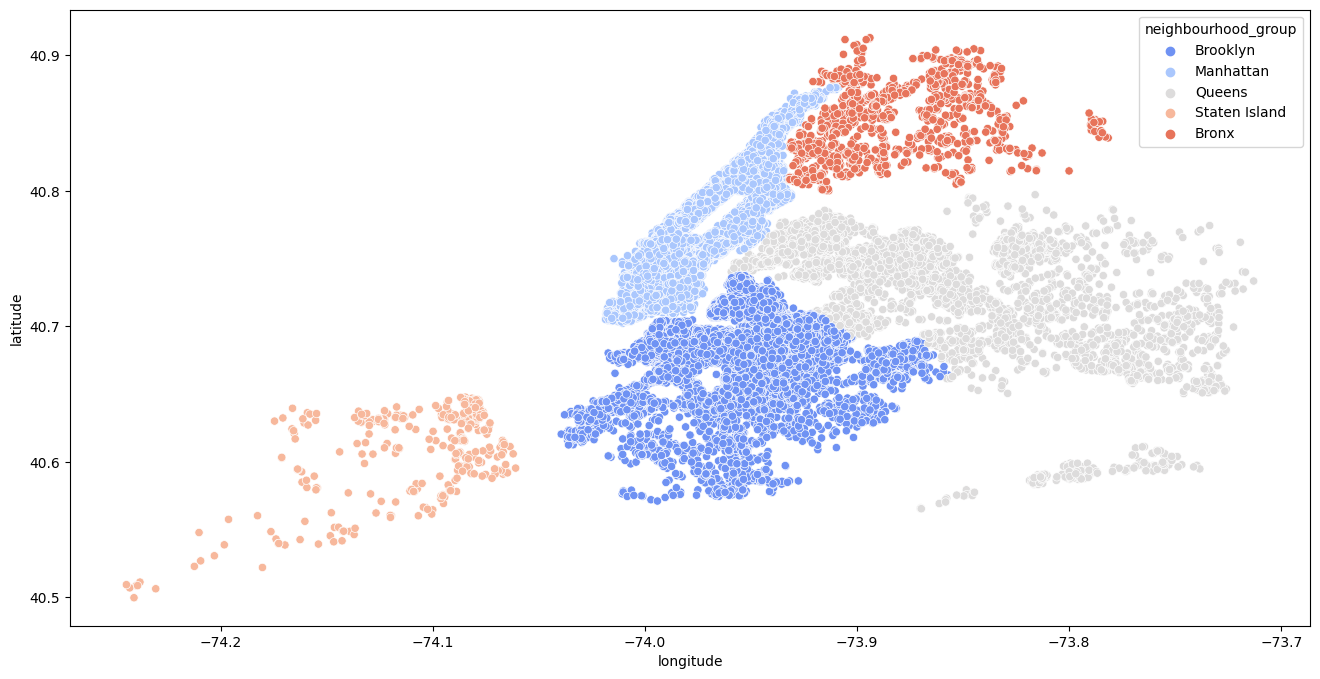

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df19.latitude,x=df19.longitude,hue=df19.neighbourhood_group,palette="coolwarm")
plt.show()

###Top 20 Hosts

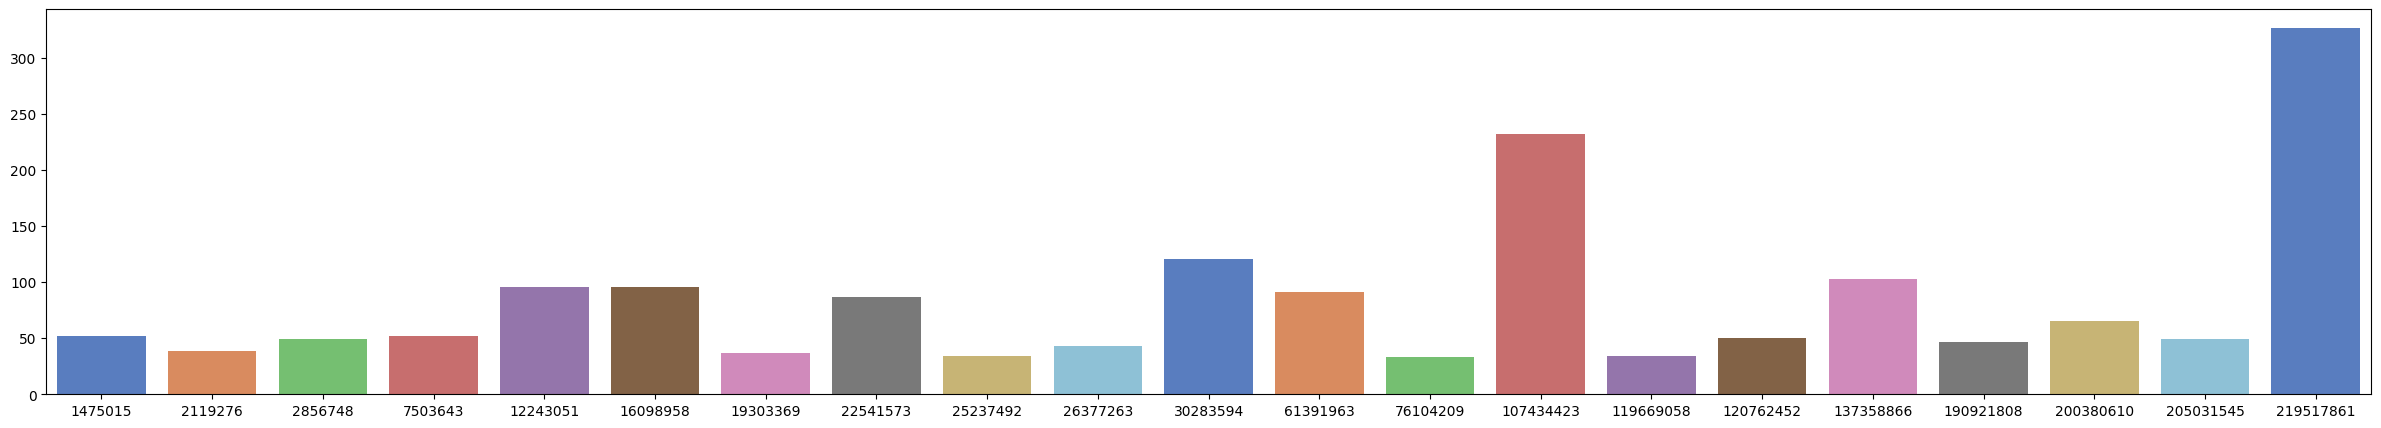

In [ ]:
df19 = df19.host_id.value_counts()[:21]
f,ax = plt.subplots(figsize=(30,5))
ax = sns.barplot(x = df19.index,y=df19.values,palette="muted")
plt.show()

The above graph displays the house-listing count of various hosts. From the graph it is clear that host_id.219517861 has the highest house listings provided amongst all hosts.

##Availability

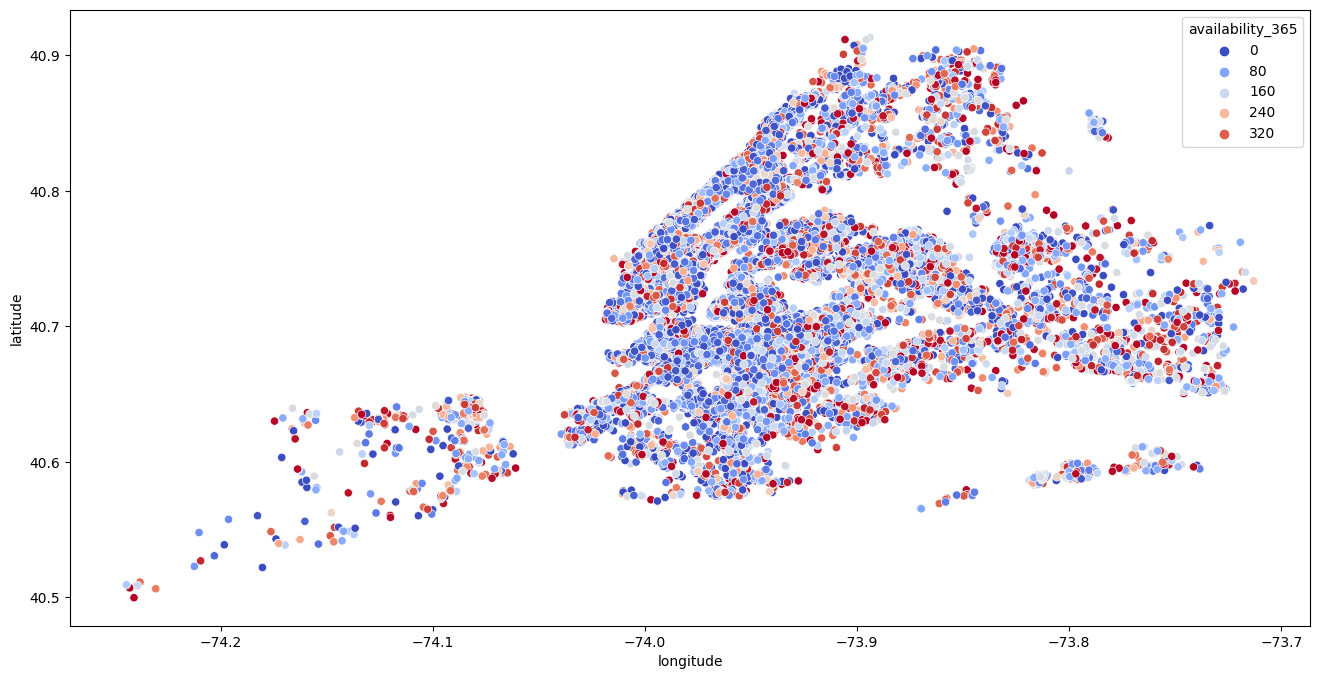

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df19.latitude,x=df19.longitude,hue=df19.availability_365,palette="coolwarm")
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df23.latitude,x=df23.longitude,hue=df23.availability_365,palette="coolwarm")
plt.show()

**Work**

In [ ]:
from wordcloud import WordCloud

Creating a worldcloud.

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df19.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood2019.png')
plt.show()

In [ ]:
#Get Correlation between different variables
corr = df19.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
df19.columns



In [ ]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Null values in last_review and reviews_per_month', fontsize=15)
sns.heatmap(df[['last_review','reviews_per_month' ]].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x= df.price.values.reshape(-1,1)
y=df.minimum_nights.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)


In [ ]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

The aboove graph is a linear regression graph of **price vs minimum_nights**.

In [ ]:
a= df.price.values.reshape(-1,1)
b=df.availability_365.values.reshape(-1,1)

l = LinearRegression()
l.fit(x,y)
b_pred = lr.predict(a)

In [ ]:
plt.scatter(a,b)
plt.plot(a, b_pred, color='black')
plt.show()

The aboove graph is a linear regression graph of **price vs availability_365**.

#Conclusion

In conclusion, bivariate method is the best representatoon of the data due to the representation of groups and neighbourhood in an enhanced way. The linear graph cannot provide clear analysis about the data.